# Session 3:  Analysis Tools

<a id='trajanalysis'></a>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

Authors: 

- Dr Micaela Matta - [@micaela-matta](https://github.com/micaela-matta)
- Dr Richard Gowers - [@richardjgowers](https://github.com/richardjgowers) 

This notebook is adapted from materials developed for the [2018 Workshop/Hackathon](https://github.com/MDAnalysis/WorkshopHackathon2018) and the [MDAnalysis User Guide](https://userguide.mdanalysis.org/stable/examples/analysis/custom_trajectory_analysis.html#Creating-an-analysis-from-a-function).

### Learning outcomes 

- Using built-in analysis methods that act on `positions` and iterating over a trajectory
- Using analysis methods that act on `Atomgroups`, such as radial distribution function or persistence length
- Creating your own analysis tools with MDAnalysis


#### Additional resources

 - During the workshop, feel free to ask questions at any time
 - For more on how to use MDAnalysis, see the [User Guide](https://userguide.mdanalysis.org/2.0.0-dev0/) and [documentation](https://docs.mdanalysis.org/2.0.0-dev0/)
 - Ask questions on the [GitHub Discussions forum](https://github.com/MDAnalysis/mdanalysis/discussions) or on [Discord](https://discord.gg/fXTSfDJyxE)
 - Report bugs on [GitHub](https://github.com/MDAnalysis/mdanalysis/issues?)


# Google Colab package installs

This installs the necessary packages for Google Colab. Please only run these if you are using Colab.

In [ ]:
# NBVAL_SKIP
!pip install condacolab
import condacolab
condacolab.install()

In [ ]:
# NBVAL_SKIP
import condacolab
condacolab.check()
!mamba install -c conda-forge mdanalysis mdanalysistests mdanalysisdata nglview rdkit

In [ ]:
# NBVAL_SKIP
# enable third party jupyter widgets
from google.colab import output
output.enable_custom_widget_manager()

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.lib import distances 
from MDAnalysis.analysis import rdf
import MDAnalysisData as data

# Analysis tools 



reminder: some built-in analysis tools act on positions (which), others act on the whole universe When we iterate over the trajectory, the unit cell information and coordinates are automatically updated. In order to calculate a quantity over the entire trajectory, we can create an empty list and add the property value at each frame. 


## 1. `radius_of_gyration` and end-to-end distance calculation for the whole trajectory
Let's go back to our PEG chain and calculate the `radius_of_gyration`:

In [13]:
PEG_example = data.datasets.fetch_PEG_1chain()

In [14]:
peg_u = mda.Universe(PEG_example['topology'], PEG_example['trajectory'])

In [21]:
peg_u.atoms.residues[0]

<Residue UNL, 1>

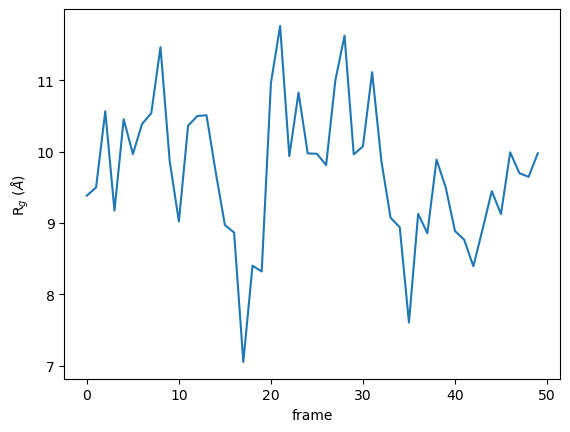

In [78]:
rog = []
Os = peg_u.select_atoms('type os')
for ts in peg_u.trajectory:
    rog.append(Os.radius_of_gyration())

#now let's plot:
plt.plot(rog)
plt.xlabel('frame')
plt.ylabel(r"R$_{g}$ ($\AA$)")
plt.show()


In [ ]:
<div class="alert alert-warning"><b> Exercise:  </b> 

 </div> 


## 2. Radial Distribution Function (RDF) calculation
<a id='rdf'></a>

Radial distribution function describes the probability of finding an atom/molecule within a certain distance of another. The MDAnalysis analysis class has a built-in `rdf` tool for this purpose. 

We will demonstrate how to calculate the RDF between PEG oxygens and water oxygens. Let's first define our atomgroups:

In [22]:
ow = peg_u.select_atoms('type OW')

op = peg_u.select_atoms('resname UNL and element O')

We use the `rdf.InterRDF` function to calculate the radial distribution function:

In [41]:
OO_rdf = rdf.InterRDF(ow, op, range=(0,10))

We need to `.run()` the radial distribution function, and optionally select an interval of frames:

In [42]:
RDF = OO_rdf.run()

This returns a `results` dictionary reporting the `bins` and `rdf` values:

In [43]:
RDF.results['bins']

array([0.06666667, 0.2       , 0.33333333, 0.46666667, 0.6       ,
       0.73333333, 0.86666667, 1.        , 1.13333333, 1.26666667,
       1.4       , 1.53333333, 1.66666667, 1.8       , 1.93333333,
       2.06666667, 2.2       , 2.33333333, 2.46666667, 2.6       ,
       2.73333333, 2.86666667, 3.        , 3.13333333, 3.26666667,
       3.4       , 3.53333333, 3.66666667, 3.8       , 3.93333333,
       4.06666667, 4.2       , 4.33333333, 4.46666667, 4.6       ,
       4.73333333, 4.86666667, 5.        , 5.13333333, 5.26666667,
       5.4       , 5.53333333, 5.66666667, 5.8       , 5.93333333,
       6.06666667, 6.2       , 6.33333333, 6.46666667, 6.6       ,
       6.73333333, 6.86666667, 7.        , 7.13333333, 7.26666667,
       7.4       , 7.53333333, 7.66666667, 7.8       , 7.93333333,
       8.06666667, 8.2       , 8.33333333, 8.46666667, 8.6       ,
       8.73333333, 8.86666667, 9.        , 9.13333333, 9.26666667,
       9.4       , 9.53333333, 9.66666667, 9.8       , 9.93333

In [44]:
RDF.results['rdf']

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11727948, 0.92430954,
       1.32324994, 0.93405137, 0.59566431, 0.40776877, 0.31644384,
       0.3026547 , 0.34438248, 0.43761363, 0.53401915, 0.59406735,
       0.72100681, 0.78845439, 0.98541611, 1.02955019, 1.12292677,
       1.05667362, 1.04807898, 1.03053044, 0.97174917, 0.91501353,
       0.865612  , 0.85225941, 0.81316886, 0.84762476, 0.8425946 ,
       0.80643894, 0.8110737 , 0.8593089 , 0.85546125, 0.83803207,
       0.89540389, 0.89050544, 0.89989291, 0.9274632 , 0.90989499,
       0.93557784, 0.92790716, 0.95485137, 0.93364579, 0.95010142,
       0.95801225, 0.95584896, 0.94205195, 0.9592417 , 0.95232488,
       0.9456083 , 0.9246905 , 0.92715433, 0.95203695, 0.92341869,
       0.90962364, 0.95063214, 0.93427648, 0.96539971, 0.98711

We can now plot the RDF between the oxygens of water and PEG:

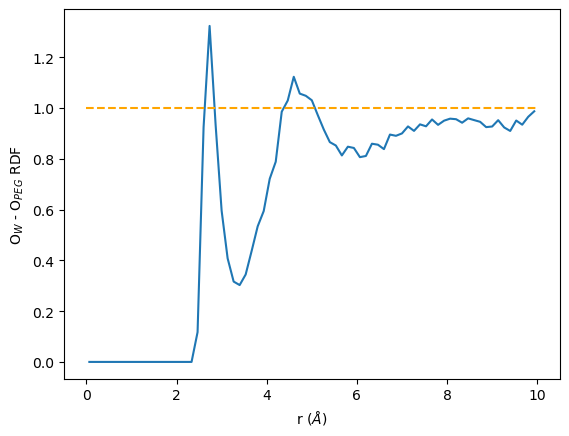

In [79]:
plt.plot(RDF.results['bins'], RDF.results['rdf'])
plt.hlines(1, 0, 10, linestyles='dashed', colors='orange')
plt.xlabel('r ($\AA$)')
plt.ylabel(r'O$_{W}$ - O$_{PEG}$ RDF')
plt.show()

## 3. Persistence length 

This is also a built-in method. In this case, we don't have to iterate over the trajectory because the function already does that for us.

In analysing polymers, the persistence length is a measure of a chains stiffness.  The persistence length is the distance at which the direction of two points on a polymer chain becomes decorrelated.  High persistence lengths indicate that the polymer chain is rigid and doesn't change direction, low persistence lengths indicate that the polymer chain has little memory of its orientation.

The bond autocorrelation function $C(n)$ measures the average cosine of the angle between bond vector $\mathbf{a_i}$ and a bond vector $n$ bonds away. 

$$C(n) = \langle \cos\theta_{i, i+n} \rangle= \langle \mathbf{a_i} \cdot \mathbf{a_{i+n}} \rangle$$

This is then fitted to an exponential decay, where $l_B$ is the average bond length, and $l_P$ is the persistence length.


$$C(n) \approx \exp\left(-\frac{n l_B}{l_P}\right)$$


In [46]:
from MDAnalysis.analysis.polymer import PersistenceLength

Select the backbone of the polymer. It's easy in this case since we only need to exclude hydrogens:

In [53]:
backbone=peg_u.select_atoms('name C*')
backbone

<AtomGroup with 40 atoms>

It is important that the contents of the polymer `atomgroup` are in order. 
Selections done using `select_atoms` will always be sorted.
This can be checked by listing the `atomgroup`.

In [54]:
list(backbone[:10])

[<Atom 1: C of type c3 of resname UNL, resid 1 and segid SYSTEM>,
 <Atom 2: C1 of type c3 of resname UNL, resid 1 and segid SYSTEM>,
 <Atom 9: C2 of type c3 of resname UNL, resid 1 and segid SYSTEM>,
 <Atom 11: C3 of type c3 of resname UNL, resid 1 and segid SYSTEM>,
 <Atom 17: C4 of type c3 of resname UNL, resid 1 and segid SYSTEM>,
 <Atom 18: C5 of type c3 of resname UNL, resid 1 and segid SYSTEM>,
 <Atom 24: C6 of type c3 of resname UNL, resid 1 and segid SYSTEM>,
 <Atom 25: C7 of type c3 of resname UNL, resid 1 and segid SYSTEM>,
 <Atom 31: C8 of type c3 of resname UNL, resid 1 and segid SYSTEM>,
 <Atom 32: C9 of type c3 of resname UNL, resid 1 and segid SYSTEM>]

Run the `PersistenceLength` function: 

In [58]:
pl=PersistenceLength([backbone]).run()

In [61]:
pl.results

{'bond_autocorrelation': array([ 1.00000000e+00,  6.72148759e-01,  3.54346264e-01,  1.41666921e-01,
        4.94387948e-02,  4.45593396e-02,  6.72881571e-02,  7.29808807e-02,
        8.34242593e-02,  8.63489278e-02,  8.14184623e-02,  9.02930232e-02,
        8.01578663e-02,  5.98750657e-02,  3.64280884e-02,  1.53724957e-02,
        6.73383630e-03,  1.43223297e-03, -3.22283336e-03,  6.01519012e-03,
        2.66392397e-02,  2.80005497e-02,  2.47278752e-02, -6.98989928e-03,
       -4.94591792e-05,  1.60605049e-02,  1.52100240e-02,  1.55591869e-02,
        6.36799466e-03,  3.71018410e-03,  9.96304618e-03, -1.09818721e-02,
       -1.69821617e-02,  2.76622963e-02,  4.35913467e-02,  6.05447149e-02,
        6.59789467e-02,  5.68086100e-02, -3.02987695e-03]), 'lb': 1.9778843772196308, 'x': array([ 0.        ,  1.97788438,  3.95576875,  5.93365313,  7.91153751,
        9.88942189, 11.86730626, 13.84519064, 15.82307502, 17.80095939,
       19.77884377, 21.75672815, 23.73461253, 25.7124969 , 27.690

We can plot the autocorrelation using `pl.results`.
The tool also returns the exponential decay fit for us, which yields the persistence length `lp`.
We can check the validity of the fit by plotting the results:

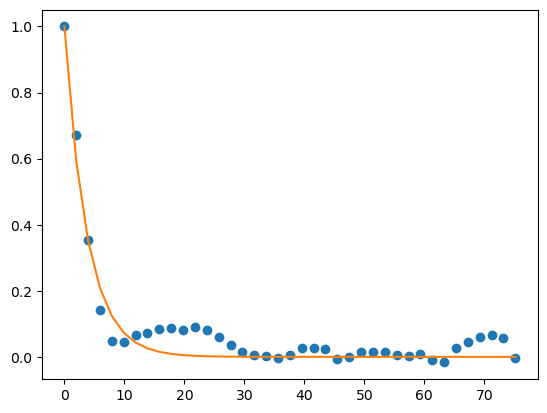

In [65]:
plt.plot(pl.results['x'], pl.results['bond_autocorrelation'], 'o')
plt.plot(pl.results['x'], pl.results['fit'])
plt.show()

.. Or just look at the value of $l_{P}$:

In [67]:
pl.results['lp']

3.7822923551780923

## 4. Root mean square deviation (RMSD)
We calculate the RMSD of domains in adenylate kinase as it transitions from an open to closed structure, 

In [83]:
from MDAnalysis.tests.datafiles import PSF, DCD, CRD
from MDAnalysis.analysis import rms

import pandas as pd

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. ([BDPW09]) The trajectory DCD samples a transition from a closed to an open conformation. AdK has three domains:

- CORE
- LID: an ATP-binding domain
- NMP: an AMP-binding domain

The LID and NMP domains move around the stable CORE as the enzyme transitions between the opened and closed conformations. One way to quantify this movement is by calculating the root mean square deviation (RMSD) of atomic positions.

In [84]:
u = mda.Universe(PSF, DCD)  # closed AdK (PDB ID: 1AKE)
ref = mda.Universe(PSF, CRD)  # open AdK (PDB ID: 4AKE)

/Users/micaela/miniconda3/envs/mda_workshop/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


## Background

The root mean square deviation (RMSD) of particle coordinates is one measure of distance, or dissimilarity, between molecular conformations. Each structure should have matching elementwise atoms $i$ in the same order, as the distance between them is calculated and summed for the final result. It is calculated between coordinate arrays $\mathbf{x}$ and $\mathbf{x}^{\text{ref}}$ according to the equation below:

$$ \text{RMSD}(\mathbf{x}, \mathbf{x}^{\text{ref}}) = \sqrt{\frac{1}{n} \sum_{i=1}^{n}{|\mathbf{x}_i-\mathbf{x}_i^{\text{ref}}|^2}} $$

As molecules can move around, the structure $\mathbf{x}$ is usually translated by a vector $\mathbf{t}$ and rotated by a matrix $\mathsf{R}$ to align with the reference $\mathbf{x}^{\text{ref}}$ such that the RMSD is minimised. The RMSD after this optimal superposition can be expressed as follows:

$$ \text{RMSD}(\mathbf{x}, \mathbf{x}^{\text{ref}}) = \min_{\mathsf{R}, \mathbf{t}} %
  \sqrt{\frac{1}{N} \sum_{i=1}^{N} \left[ %
      (\mathsf{R}\cdot\mathbf{x}_{i}(t) + \mathbf{t}) - \mathbf{x}_{i}^{\text{ref}} \right]^{2}}$$

The RMSD between one reference state and a trajectory of structures is often calculated as a way to measure the dissimilarity of the trajectory conformational ensemble to the reference. This reference is frequently the first frame of the trajectory (the default in MDAnalysis), in which case it can provide insight into the overall movement from the initial starting point. W

Typically not all coordinates in a structures are included in an RMSD analysis. With proteins, the fluctuation of the residue side-chains is not representative of overall conformational change. Therefore when RMSD analyses are performed to investigate large-scale movements in proteins, the atoms are usually restricted only to the backbone atoms (forming the amide-bond chain) or the alpha-carbon atoms. 

MDAnalysis provides functions and classes to calculate the RMSD between coordinate arrays, and `Universes` or `AtomGroups`.  The contribution of each particle $i$ to the final RMSD value can also be weighted.


### RMSD between two sets of coordinates

The MDAnalysis.analysis.rms.rmsd function returns the root mean square deviation (in Angstrom) between two sets of coordinates. Here, we calculate the RMSD between the backbone atoms of the open and closed conformations of AdK. 

In [85]:
rms.rmsd(u.select_atoms('backbone').positions,  # coordinates to align
         ref.select_atoms('backbone').positions,  # reference coordinates
         center=True,  # subtract the center of geometry
         superposition=True)  # superimpose coordinates

6.823686867261616

### RMSD of a Universe with multiple selections

It is more efficient to use the `MDAnalysis.analysis.rms.RMSD` class to calculate the RMSD of an entire trajectory to a single reference point, than to use the the `MDAnalysis.analysis.rms.rmsd` function.

The `rms.RMSD` class first performs a rotational and translational alignment of the target trajectory to the reference universe at `ref_frame`, using the atoms in select to determine the transformation. The RMSD of the select selection is calculated. Then, without further alignment, the RMSD of each group in `groupselections` is calculated.

In [86]:
CORE = 'backbone and (resid 1-29 or resid 60-121 or resid 160-214)'
LID = 'backbone and resid 122-159'
NMP = 'backbone and resid 30-59'

In [87]:
R = rms.RMSD(u,  # universe to align
             u,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
             groupselections=[CORE, LID, NMP],  # groups for RMSD
             ref_frame=0)  # frame index of the reference
R.run()

The data is saved as usual in the `results` object:

In [91]:
R.results.rmsd

array([[0.00000000e+00, 9.99999912e-01, 5.83434382e-07, 3.92148643e-08,
        1.19699981e-07, 6.27649693e-08],
       [1.00000000e+00, 1.99999982e+00, 4.63659217e-01, 4.55018143e-01,
        4.87191452e-01, 4.74557226e-01],
       [2.00000000e+00, 2.99999974e+00, 6.41933990e-01, 5.75441751e-01,
        7.94099388e-01, 7.27019101e-01],
       [3.00000000e+00, 3.99999965e+00, 7.74398332e-01, 6.73918415e-01,
        1.01026120e+00, 8.79503061e-01],
       [4.00000000e+00, 4.99999956e+00, 8.58860023e-01, 7.31885946e-01,
        1.16839718e+00, 9.61298914e-01],
       [5.00000000e+00, 5.99999947e+00, 9.46003145e-01, 7.85410891e-01,
        1.35038202e+00, 1.03419071e+00],
       [6.00000000e+00, 6.99999938e+00, 1.03205274e+00, 8.67168855e-01,
        1.47239368e+00, 1.09070240e+00],
       [7.00000000e+00, 7.99999930e+00, 1.14440254e+00, 9.70259184e-01,
        1.65804008e+00, 1.12936599e+00],
       [8.00000000e+00, 8.99999921e+00, 1.22312507e+00, 1.00190033e+00,
        1.80572720e+00, 

### Plotting the data

We can easily plot this data using the common data analysis package `pandas`. We turn the `R.rmsd` array into a `DataFrame` and label each column below.


In [92]:
df = pd.DataFrame(R.results.rmsd,
                  columns=['Frame', 'Time (ns)',
                           'Backbone', 'CORE',
                           'LID', 'NMP'])

df

,Frame,Time (ns),Backbone,CORE,LID,NMP
0,0.0,1.000000,5.834344e-07,3.921486e-08,1.197000e-07,6.276497e-08
1,1.0,2.000000,4.636592e-01,4.550181e-01,4.871915e-01,4.745572e-01
2,2.0,3.000000,6.419340e-01,5.754418e-01,7.940994e-01,7.270191e-01
3,3.0,4.000000,7.743983e-01,6.739184e-01,1.010261e+00,8.795031e-01
4,4.0,5.000000,8.588600e-01,7.318859e-01,1.168397e+00,9.612989e-01
...,...,...,...,...,...,...
93,93.0,93.999992,6.817898e+00,3.504430e+00,1.143376e+01,1.029266e+01
94,94.0,94.999992,6.804211e+00,3.480681e+00,1.141134e+01,1.029879e+01
95,95.0,95.999992,6.807987e+00,3.508946e+00,1.137593e+01,1.031958e+01
96,96.0,96.999991,6.821205e+00,3.498081e+00,1.139156e+01,1.037768e+01


Text(0, 0.5, 'RMSD ($\\AA$)')

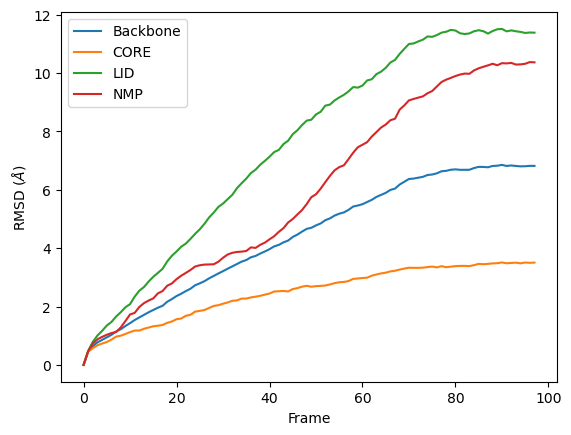

In [93]:
ax = df.plot(x='Frame', y=['Backbone', 'CORE', 'LID', 'NMP'],
             kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')

## 5. Writing your own analysis method

We will now demonstrate how to create your own analysis methods using the same

This can generally be done in three ways, from least to most flexible:

 1. [Running the analysis directly from a function](#Creating-an-analysis-from-a-function)
 
 2. [Turning a function into a class](#Transforming-a-function-into-a-class)
 
 3. [Writing your own class](#Creating-your-own-class)

Note: the building blocks and methods shown in this section are only suitable for analyses that involve iterating over the trajectory once.

**If you implement your own analysis method, please consider [contributing it to the MDAnalysis codebase!](https://www.mdanalysis.org/UserGuide/contributing.html)**


In [95]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD, DCD2
from MDAnalysis.analysis.base import (AnalysisBase,
                                      AnalysisFromFunction,
                                      analysis_class)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Radius of gyration

Let's start off by defining a standalone analysis function.

The radius of gyration of a structure measures how compact it is. In [GROMACS](http://manual.gromacs.org/documentation/2019-rc1/reference-manual/analysis/radius-of-gyration.html), it is calculated as follows: 

$$ R_g = \sqrt{\frac{\sum_i m_i \mathbf{r}_i^2}{\sum_i m_i}}$$

where $m_i$ is the mass of atom $i$ and $\mathbf{r}_i$ is the position of atom $i$, relative to the center-of-mass of the selection.

The radius of gyration around each axis can also be determined separately. For example, the radius of gyration around the x-axis:

$$ R_{i, x} = \sqrt{\frac{\sum_i m_i [r_{i, y}^2 + r_{i, z}^2]}{\sum_i m_i}}$$

Below, we define a function that takes an AtomGroup and calculates the radii of gyration. We could write this function to only need the AtomGroup. However, we also add in a `masses` argument and a `total_mass` keyword to avoid recomputing the mass and total mass for each frame.

In [97]:
def radgyr(atomgroup, masses, total_mass=None):
    # coordinates change for each frame
    coordinates = atomgroup.positions
    center_of_mass = atomgroup.center_of_mass()
    
    # get squared distance from center
    ri_sq = (coordinates-center_of_mass)**2
    # sum the unweighted positions
    sq = np.sum(ri_sq, axis=1)
    sq_x = np.sum(ri_sq[:,[1,2]], axis=1) # sum over y and z
    sq_y = np.sum(ri_sq[:,[0,2]], axis=1) # sum over x and z
    sq_z = np.sum(ri_sq[:,[0,1]], axis=1) # sum over x and y
    
    # make into array
    sq_rs = np.array([sq, sq_x, sq_y, sq_z])
    
    # weight positions
    rog_sq = np.sum(masses*sq_rs, axis=1)/total_mass
    # square root and return
    return np.sqrt(rog_sq)

### Loading files

The test files we will be working with here feature adenylate kinase (AdK), a phosophotransferase enzyme. (<a data-cite="beckstein_zipping_2009" href="https://doi.org/10.1016/j.jmb.2009.09.009">Beckstein *et al.*, 2009</a>)

In [96]:
u = mda.Universe(PSF, DCD)
protein = u.select_atoms('protein')

u2 = mda.Universe(PSF, DCD2)

/Users/micaela/miniconda3/envs/mda_workshop/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


### Creating an analysis from a function

`MDAnalysis.analysis.base.AnalysisFromFunction` can create an analysis from a function that works on AtomGroups. It requires the function itself, the trajectory to operate on, and then the arguments / keyword arguments necessary for the function.

In [98]:
rog = AnalysisFromFunction(radgyr, u.trajectory, 
                           protein, protein.masses, 
                           total_mass=np.sum(protein.masses))
rog.run()

Running the analysis iterates over the trajectory. The output is saved in `rog.results.timeseries`, which has the same number of rows, as frames in the trajectory. You can access the results both at `rog.results.timeseries` and `rog.results['timeseries']`:

In [99]:
rog.results['timeseries'].shape

(98, 4)

gives the same outputs as:

In [100]:
rog.results.timeseries.shape

(98, 4)

Text(0.5, 0, 'Frame')

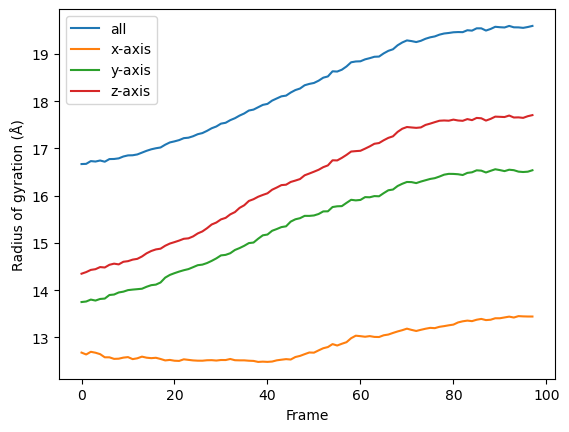

In [101]:
labels = ['all', 'x-axis', 'y-axis', 'z-axis']
for col, label in zip(rog.results['timeseries'].T, labels):
    plt.plot(col, label=label)
plt.legend()
plt.ylabel('Radius of gyration (Å)')
plt.xlabel('Frame')

You can also re-run the analysis with different frame selections. 

Below, we start from the 10th frame and take every 8th frame until the 80th. Note that the slice includes the `start` frame, but does not include the `stop` frame index (much like the actual `range()` function).

In [102]:
rog_10 = AnalysisFromFunction(radgyr, u.trajectory, 
                              protein, protein.masses, 
                              total_mass=np.sum(protein.masses))

rog_10.run(start=10, stop=80, step=7)
rog_10.results['timeseries'].shape

(10, 4)

Text(0.5, 0, 'Frame')

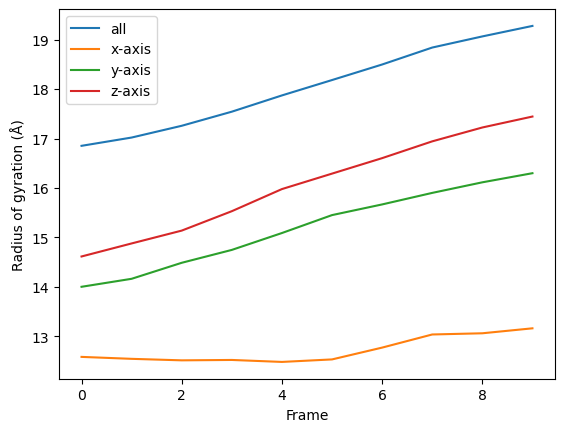

In [103]:
for col, label in zip(rog_10.results['timeseries'].T, labels):
    plt.plot(col, label=label)
plt.legend()
plt.ylabel('Radius of gyration (Å)')
plt.xlabel('Frame')

### Transforming a function into a class

While the `AnalysisFromFunction` is convenient for quick analyses, you may want to turn your function into a class that can be applied to many different trajectories, much like other MDAnalysis analyses.

You can apply `analysis_class` to any function that you can run with `AnalysisFromFunction` to get a class.

In [104]:
RadiusOfGyration = analysis_class(radgyr)

To run the analysis, pass exactly the same arguments as you would for `AnalysisFromFunction`.

In [105]:
rog_u1 = RadiusOfGyration(u.trajectory, protein, 
                          protein.masses,
                          total_mass=np.sum(protein.masses))
rog_u1.run()

<MDAnalysis.analysis.base.analysis_class.<locals>.WrapperClass at 0x13dc0db90>

As with `AnalysisFromFunction`, the results are in `results`.

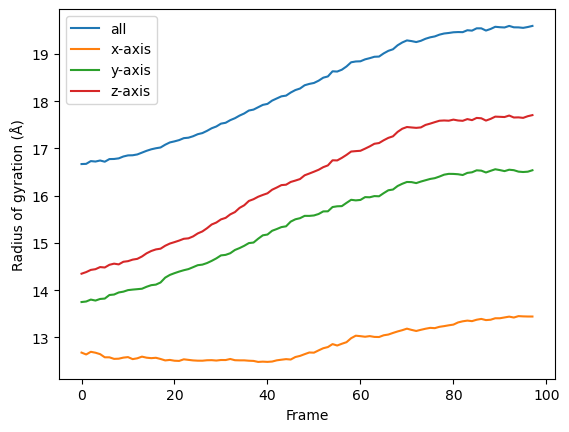

In [107]:
for col, label in zip(rog_u1.results['timeseries'].T, labels):
    plt.plot(col, label=label)
plt.legend()
plt.ylabel('Radius of gyration (Å)')
plt.xlabel('Frame')
plt.show()

## Contributing to MDAnalysis

If you think that you will want to reuse your new analysis, or that others might find it helpful, please consider [contributing it to the MDAnalysis codebase.](https://www.mdanalysis.org/UserGuide/contributing.html) Making your code open-source can have many benefits; others may notice an unexpected bug or suggest ways to optimise your code. If you write your analysis for a specific publication, please let us know; we will ask those who use your code to cite your reference in published work.